# Platypus

使用一个moea多目标优化进化算法的框架，基于python的platypus，一个较完整的示例。

platypus的安装方式如下：

```Shell
conda install -c conda-forge platypus-opt
```

In [2]:
from platypus import NSGAII, Problem, Real, GAOperator, SBX, PM, nondominated

class Belegundu(Problem):

    def __init__(self):
        # 定义决策变量，目标函数和约束的个数
        super(Belegundu, self).__init__(2, 2, 2)
        # 各个决策变量的取值范围
        self.types[:] = [Real(0, 5), Real(0, 3)]
        # 约束的形式
        self.constraints[:] = "<=0"
        # 可以定义各个目标函数是取最大值还是最小值
        self.directions[:] = [Problem.MINIMIZE, Problem.MINIMIZE]

    def evaluate(self, solution):
        # 可以把变量一个个取出，也可以数组直接赋值
        x = solution.variables[0]
        y = solution.variables[1]
        params = solution.variables
        # objectives是目标函数
        solution.objectives[:] = cal_fitness(params)
        # 定义解的约束
        solution.constraints[:] = [-x + y - 1, x + y - 7]


def fx1(params):
    x = params[0]
    y = params[1]
    return -2 * x + y


def fx2(params):
    x = params[0]
    y = params[1]
    return 2 * x + y


def cal_fitness(params):
    return [fx1(params), fx2(params)]

算法不仅可以用默认值，也可以指定种群数量，指定交叉(用的Variation表示交叉和变异，用Mutation表示变异)、变异等具体操作运算。

比如使用GAOperator，遗传算法算子，可以使用SBX做交叉重组运算和PM做变异运算。在具体的交叉变异函数里，定义相应的交叉率，交叉分布指数，变异率，变异分布指数等。

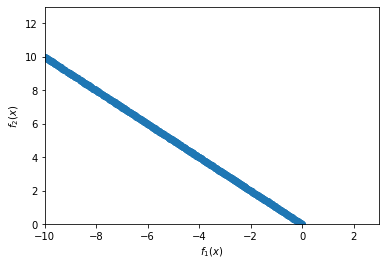

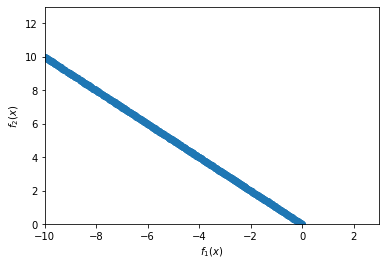

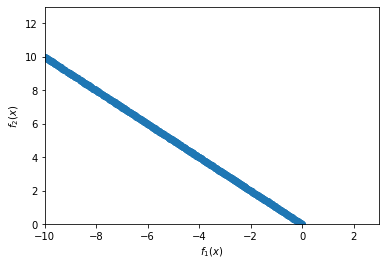

-9.99986100248741
4.9999585160964255
5.6029705440935324e-05
0.000547271763767343
1.420444067790072e-05
0.0005756806451231444
-9.458539532106858
4.7293657125402
0.0001918929735408438
-5.904756470813064
2.9523950243695123
3.357792596070386e-05
-4.157478937538235
2.0787803723475204
8.180715680576611e-05
-2.911900486847044
1.4559558000927344
1.1113338424517671e-05
-9.307504491752397
4.653776796570419
4.910138844153866e-05
-4.205495466728099
2.1029249179679272
0.0003543692077561056
-6.782057688613288
3.3914214284709217
0.0007851683285549083
-1.8901019912110277
0.9462747031976054
0.0024474151841831215
-4.767906406632486
2.3893975538771035
0.010888701121721554
-9.508436852630922
4.754221689055657
6.525480393362686e-06
-9.352454859035701
4.676258779739456
6.270044321043944e-05
-8.893281522162052
4.446740510131907
0.00019949810176031458
-7.5265666640912645
3.7653168217586277
0.004066979425990769
-3.9041629300546505
1.9522673407827364
0.00037175151082239927
-6.736525585291119
3.3684460328045223


In [3]:
algorithm = NSGAII(Belegundu(), population_size=500, variator=GAOperator(SBX(0.95, 20.0), PM(2, 25.0)))
# The final population could contain infeasible and dominated solutions if the number of function evaluations was
# insufficient (e.g. algorithm.Run(100)). In this case we would need to filter out the infeasible
# solutions:feasible_solutions = [s for s in algorithm.result if s.feasible]
# 即优化运算时，约束是软约束，所以运算代数太少，取得的值可能很多不在可行域内，因此如果是硬约束，能在初始化时约束好，就在初始化时进行约束。
algorithm.run(10000)

# plot the results using matplotlib
import matplotlib.pyplot as plt

# 展示所有解集
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlim([-10, 3])
plt.ylim([0, 13])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

# we would need to filter out the infeasible solutions:只展示非劣解集
feasible_solutions = [s for s in algorithm.result if s.feasible]
plt.scatter([s.objectives[0] for s in feasible_solutions],
            [s.objectives[1] for s in feasible_solutions])
plt.xlim([-10, 3])
plt.ylim([0, 13])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

# We could also get only the non-dominated solutions:可以只展示非劣解集
nondominated_solutions = nondominated(algorithm.result)
plt.scatter([s.objectives[0] for s in nondominated_solutions],
            [s.objectives[1] for s in nondominated_solutions])
plt.xlim([-10, 3])
plt.ylim([0, 13])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()

# 取出解集
# display the results
for solution in nondominated_solutions:
    # 目标值
    print(solution.objectives[0])
    # 对应的解集
    print(solution.variables[0])
    print(solution.variables[1])